There is a surveillance video at ... As you can see, the background is mostly constant as objects move in and out of the view. 

I have extracted individual frames of the video as PNG files scene00001.png, ..., scene00680.png.

For this assignment you will need to have added the PyPlot package. 

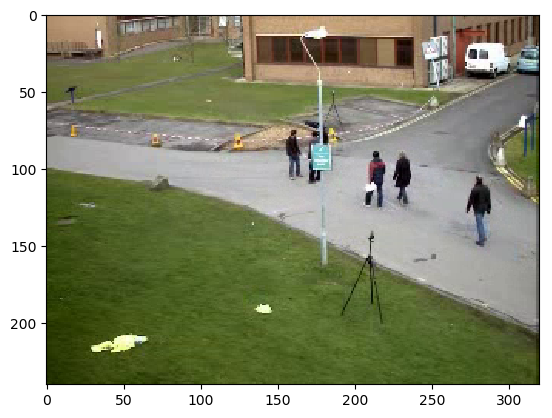

In [6]:
using PyPlot, LinearAlgebra

X = imread("/Users/driscoll/Documents/scene00100.png");
imshow(X)
#A = read(h5open("../camvideo.h5","r"),"/data");

In [8]:
size(X)

(240, 320, 3)

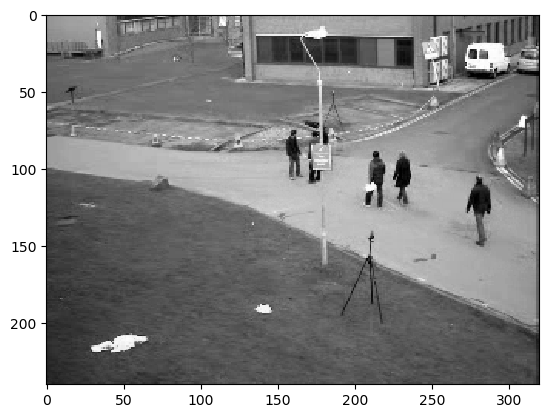

PyObject <matplotlib.image.AxesImage object at 0x148d31be0>

In [10]:
Z = 0.3*X[:,:,1] + 0.6*X[:,:,2] + 0.1*X[:,:,3];
imshow(Z,cmap="gray")

In [11]:
length(Z)

76800

In [33]:
A = zeros(eltype(Z),length(Z),680);
using Printf
for j = 1:680
    X = imread(@sprintf("/Users/driscoll/Documents/scene%05i.png",j));
    Z = 0.3*X[:,:,1] + 0.6*X[:,:,2] + 0.1*X[:,:,3];
    A[:,j] = vec(Z);
end

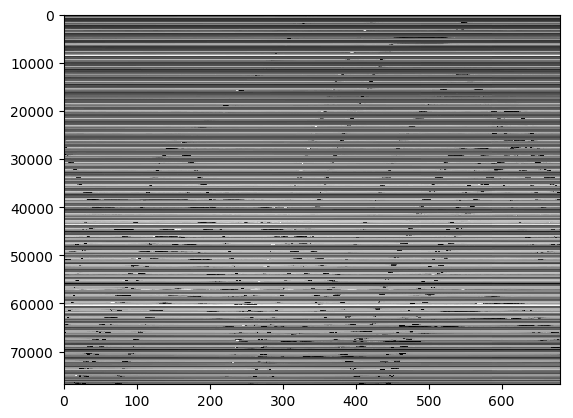

(-0.5, 679.5, 76799.5, -0.5)

In [28]:
imshow(A,cmap="gray")
axis("auto")

In [34]:
U,s,V = svd(A);

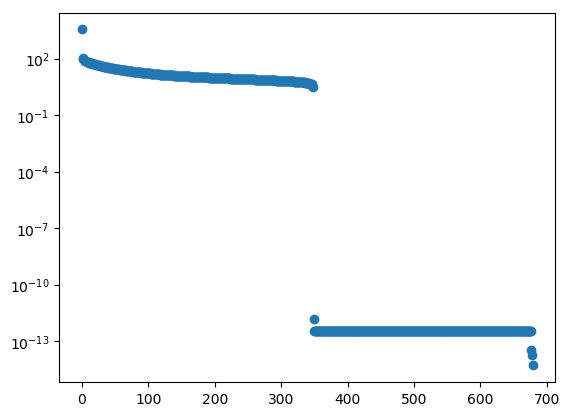

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13030f358>

In [35]:
semilogy(s,"o")

In [19]:
size(V)

(680, 680)

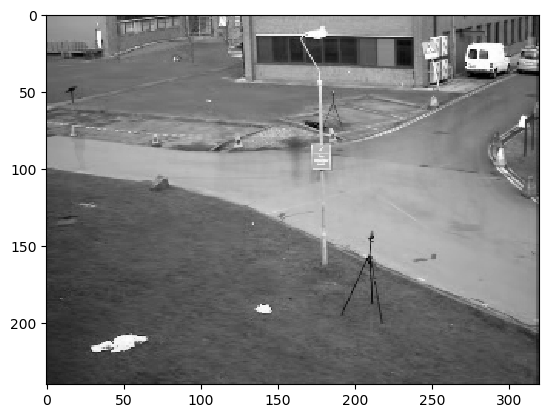

PyObject <matplotlib.image.AxesImage object at 0x1379b7630>

In [39]:
imshow(reshape(-U[:,1],240,320),cmap="gray")

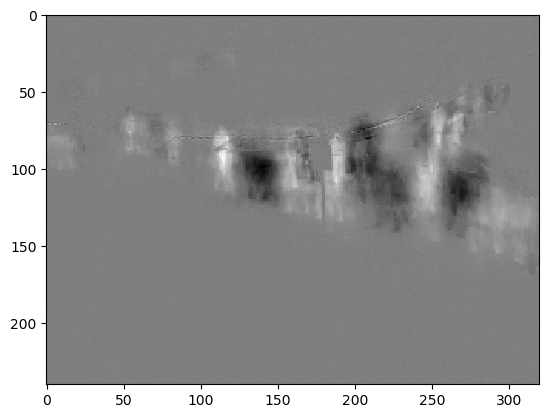

PyObject <matplotlib.image.AxesImage object at 0x130da1b70>

In [42]:
imshow(reshape(U[:,5],240,320),cmap="gray")

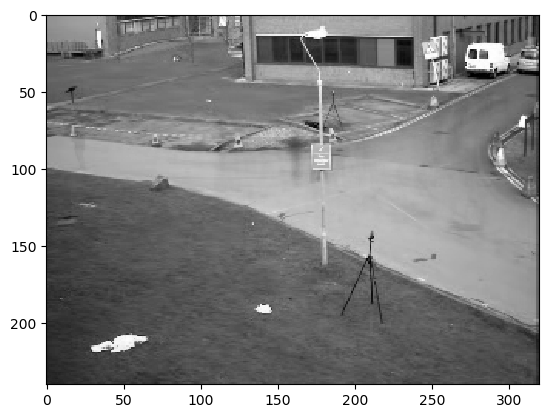

PyObject <matplotlib.image.AxesImage object at 0x135a4d390>

In [38]:
mu = sum(A,dims=2)/size(A,2);
imshow(reshape(mu,240,320),cmap="gray")

In [27]:
minimum(U)

-0.5187967721950865

## Hello world: image approximation

The following code will generate an image file `Hello.png` in your current directory. 

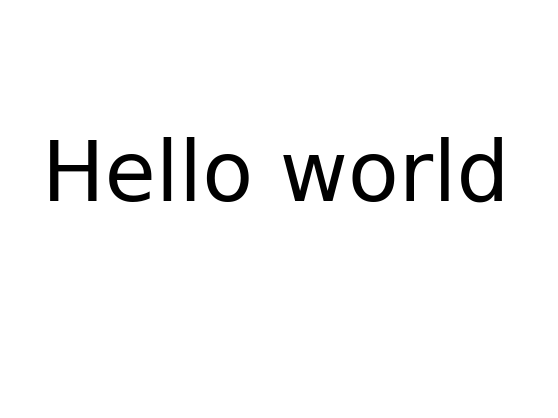

In [52]:
text(0,0.5,"Hello world",fontsize=60)
axis("off")
savefig("Hello.png",dpi=72)

This code reads it back in as a three-dimensional array. The first two dimensions are height and width of the image. The third dimension is for R, G, B, and transparency. 

In [64]:
X = imread("Hello.png");
size(X)

(345, 460, 4)

Here we extract the red channel and display it as a grayscale image. The entries of $A$ range from zero (black) to one (white).

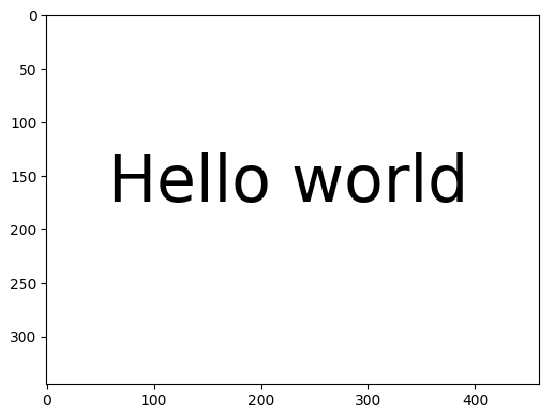

In [67]:
A = X[:,:,1];
imshow(A,cmap="gray");

* Take a thin SVD of $A$. Make a `semilogy` plot of the singular values.

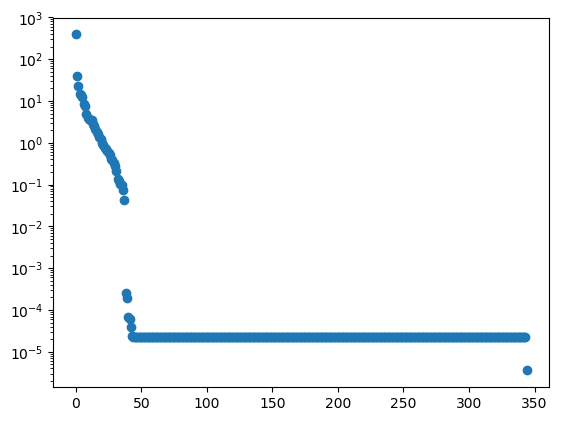

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149bd9198>

In [68]:
U,s,V = svd(A);
semilogy(s,"o");

* Use `imshow` to make a grayscale plot of the best rank-1 approximation to $A$.

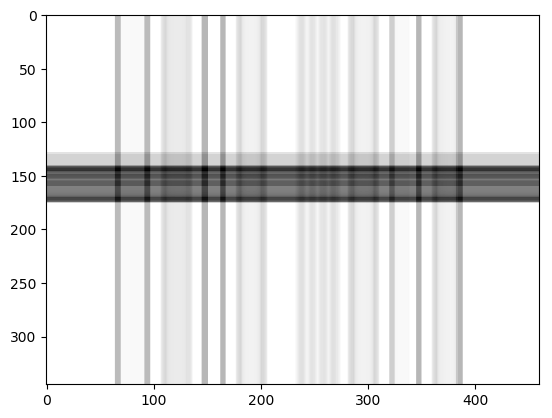

In [70]:
Ak(k) = sum(s[i]*U[:,i]*V[:,i]' for i=1:k);
imshow(Ak(1),cmap="gray");

* Use `imshow` to make a grayscale plot of the best rank-8 approximation to $A$.

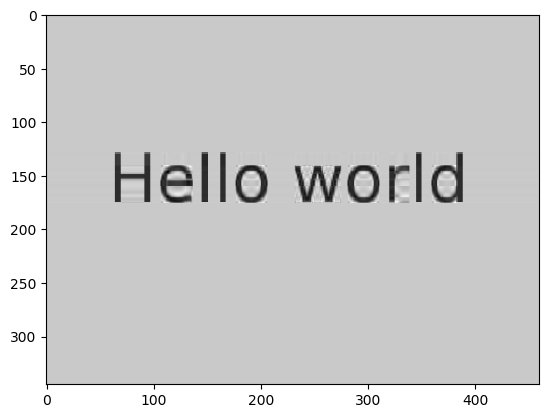

In [73]:
imshow(Ak(8),cmap="gray");

* Relative to $\|A\|_F$, what is the Frobenius norm of the error in this approximation?

In [77]:
norm(s[9:end])/norm(s)

0.026541082f0